In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=default&so=WAR&ob=DESC&year=2023&sy=&ey=&te=&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_table = soup.find_all('table')[1]  # 팀 테이블

team_df_pitching_23 = pd.read_html(str(team_table))[0]  # 팀 데이터프레임

print("페이지의 팀 기록 데이터프레임:\n")

team_df_pitching_23

페이지의 팀 기록 데이터프레임:



,Rank,Team,Unnamed: 2_level_0,정렬▼,G,GS,GR,GF,W,L,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
0,1,롯데,23,25.43,691,144,547,144,68,76,...,1070,65,2,71,4.15,4.67,4.67,3.90,1.46,25.43
1,2,KT,23,23.71,594,144,450,144,79,62,...,968,59,4,63,3.94,4.31,4.31,3.79,1.35,23.71
2,3,NC,23,22.14,688,144,544,144,75,67,...,1090,82,3,58,3.83,4.33,4.33,3.99,1.31,22.14
3,4,LG,23,21.84,737,144,593,144,86,56,...,977,86,5,47,3.70,4.24,4.24,3.98,1.36,21.84
4,5,키움,23,21.55,683,144,539,144,58,83,...,962,82,7,56,4.42,4.96,4.96,4.14,1.45,21.55
5,6,SSG,23,20.54,641,144,497,144,76,65,...,974,72,3,61,4.37,4.88,4.88,4.49,1.53,20.54
6,7,두산,23,20.06,660,144,516,144,74,68,...,1013,65,3,60,3.93,4.38,4.38,4.04,1.36,20.06
7,8,삼성,23,17.87,691,144,547,144,61,82,...,899,72,7,51,4.62,5.13,5.13,4.37,1.47,17.87
8,9,KIA,23,16.22,708,144,564,144,73,69,...,980,75,4,55,4.14,4.61,4.61,4.16,1.42,16.22


In [2]:
# 첫 번째 행을 헤더로 지정하고 데이터프레임을 새로 생성
team_2023_pitching = team_df_pitching_23.copy()
team_2023_pitching.columns = team_2023_pitching.columns.get_level_values(1)

# 첫 번째 행 제거
new_df = team_2023_pitching.drop([0])

team_2023_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
0,1,롯데,23,25.43,691,144,547,144,68,76,...,1070,65,2,71,4.15,4.67,4.67,3.90,1.46,25.43
1,2,KT,23,23.71,594,144,450,144,79,62,...,968,59,4,63,3.94,4.31,4.31,3.79,1.35,23.71
2,3,NC,23,22.14,688,144,544,144,75,67,...,1090,82,3,58,3.83,4.33,4.33,3.99,1.31,22.14
3,4,LG,23,21.84,737,144,593,144,86,56,...,977,86,5,47,3.70,4.24,4.24,3.98,1.36,21.84
4,5,키움,23,21.55,683,144,539,144,58,83,...,962,82,7,56,4.42,4.96,4.96,4.14,1.45,21.55
5,6,SSG,23,20.54,641,144,497,144,76,65,...,974,72,3,61,4.37,4.88,4.88,4.49,1.53,20.54
6,7,두산,23,20.06,660,144,516,144,74,68,...,1013,65,3,60,3.93,4.38,4.38,4.04,1.36,20.06
7,8,삼성,23,17.87,691,144,547,144,61,82,...,899,72,7,51,4.62,5.13,5.13,4.37,1.47,17.87
8,9,KIA,23,16.22,708,144,564,144,73,69,...,980,75,4,55,4.14,4.61,4.61,4.16,1.42,16.22
9,10,한화,23,14.77,752,144,608,144,58,80,...,1037,68,7,73,4.38,4.93,4.93,4.21,1.40,14.77


In [3]:
team_2023_pitching.drop(columns=['WAR▼'], inplace=True)
team_2023_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,...,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,롯데,23,25.43,691,144,547,144,68,76,...,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46
1,2,KT,23,23.71,594,144,450,144,79,62,...,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35
2,3,NC,23,22.14,688,144,544,144,75,67,...,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31
3,4,LG,23,21.84,737,144,593,144,86,56,...,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36
4,5,키움,23,21.55,683,144,539,144,58,83,...,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45
5,6,SSG,23,20.54,641,144,497,144,76,65,...,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53
6,7,두산,23,20.06,660,144,516,144,74,68,...,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36
7,8,삼성,23,17.87,691,144,547,144,61,82,...,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47
8,9,KIA,23,16.22,708,144,564,144,73,69,...,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42
9,10,한화,23,14.77,752,144,608,144,58,80,...,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40


In [4]:
pd.set_option('display.max_columns', None)
team_2023_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,롯데,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46
1,2,KT,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35
2,3,NC,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31
3,4,LG,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36
4,5,키움,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45
5,6,SSG,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53
6,7,두산,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36
7,8,삼성,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47
8,9,KIA,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42
9,10,한화,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40


# 심화

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=deepen&so=FIP&ob=ASC&year=2023&sy=&ey=&te=&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_table = soup.find_all('table')[1]  # 팀 테이블

team_df_pitching_23_2 = pd.read_html(str(team_table))[0]  # 팀 데이터프레임

print("페이지의 팀 기록 데이터프레임:\n")

team_df_pitching_23_2

페이지의 팀 기록 데이터프레임:



,Rank,Team,Unnamed: 2_level_0,정렬▲,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
,Rank,Team,Unnamed: 2_level_1,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,23,3.79,594,6.77,2.89,2.34,0.58,17.5,7.5,10.0,0.315,70.1,3.94,4.31,4.31,3.79,3.11,4.20,0.15,90.15,84.74,87.28,0.268,0.328,0.371,0.699,20672,34.8,16.1,3.73
1,2,롯데,23,3.90,691,7.57,3.76,2.01,0.57,18.9,9.4,9.5,0.327,70.1,4.15,4.67,4.67,3.90,3.23,4.26,0.25,94.37,92.30,90.36,0.270,0.348,0.374,0.722,22286,32.3,17.5,3.94
2,3,LG,23,3.98,737,6.80,3.42,1.99,0.52,17.4,8.7,8.6,0.303,70.7,3.70,4.24,4.24,3.98,3.37,4.36,-0.28,92.83,98.19,99.90,0.256,0.330,0.351,0.681,21814,29.6,16.9,3.88
3,4,NC,23,3.99,688,7.66,3.60,2.12,0.70,19.8,9.3,10.5,0.289,70.0,3.83,4.33,4.33,3.99,3.14,4.14,-0.16,90.98,92.11,95.80,0.241,0.320,0.350,0.670,21941,31.9,17.1,3.99
4,5,두산,23,4.04,660,7.10,3.51,2.02,0.63,18.1,9.0,9.2,0.302,70.7,3.93,4.38,4.38,4.04,3.31,4.30,-0.11,97.89,102.07,101.52,0.255,0.332,0.366,0.698,22142,33.5,17.2,3.97
5,6,키움,23,4.14,683,6.72,3.72,1.81,0.59,16.9,9.3,7.5,0.314,67.4,4.42,4.96,4.96,4.14,3.44,4.50,0.28,108.17,111.11,101.85,0.269,0.343,0.376,0.719,21903,32.1,17.0,3.84
6,7,KIA,23,4.16,708,6.95,4.00,1.74,0.63,17.6,10.1,7.5,0.304,69.8,4.14,4.61,4.61,4.16,3.42,4.50,-0.02,100.36,101.79,102.99,0.258,0.340,0.369,0.709,21710,30.7,17.1,3.91
7,8,한화,23,4.21,752,7.23,3.61,2.00,0.70,18.3,9.1,9.1,0.308,68.0,4.38,4.93,4.93,4.21,3.36,4.30,0.17,104.85,105.06,101.29,0.261,0.340,0.384,0.724,22355,29.7,17.3,3.93
8,9,삼성,23,4.37,691,6.33,3.27,1.94,0.85,15.8,8.2,7.7,0.318,68.2,4.62,5.13,5.13,4.37,3.34,4.48,0.25,106.38,102.55,102.04,0.280,0.344,0.408,0.752,22135,32.0,17.3,3.90


In [6]:
# 첫 번째 행을 헤더로 지정하고 데이터프레임을 새로 생성
team_2023_pitching_2 = team_df_pitching_23_2.copy()
team_2023_pitching_2.columns = team_2023_pitching_2.columns.get_level_values(1)

# 첫 번째 행 제거
new_df = team_2023_pitching_2.drop([0])

team_2023_pitching_2

,Rank,Team,Unnamed: 2_level_1,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,23,3.79,594,6.77,2.89,2.34,0.58,17.5,7.5,10.0,0.315,70.1,3.94,4.31,4.31,3.79,3.11,4.20,0.15,90.15,84.74,87.28,0.268,0.328,0.371,0.699,20672,34.8,16.1,3.73
1,2,롯데,23,3.90,691,7.57,3.76,2.01,0.57,18.9,9.4,9.5,0.327,70.1,4.15,4.67,4.67,3.90,3.23,4.26,0.25,94.37,92.30,90.36,0.270,0.348,0.374,0.722,22286,32.3,17.5,3.94
2,3,LG,23,3.98,737,6.80,3.42,1.99,0.52,17.4,8.7,8.6,0.303,70.7,3.70,4.24,4.24,3.98,3.37,4.36,-0.28,92.83,98.19,99.90,0.256,0.330,0.351,0.681,21814,29.6,16.9,3.88
3,4,NC,23,3.99,688,7.66,3.60,2.12,0.70,19.8,9.3,10.5,0.289,70.0,3.83,4.33,4.33,3.99,3.14,4.14,-0.16,90.98,92.11,95.80,0.241,0.320,0.350,0.670,21941,31.9,17.1,3.99
4,5,두산,23,4.04,660,7.10,3.51,2.02,0.63,18.1,9.0,9.2,0.302,70.7,3.93,4.38,4.38,4.04,3.31,4.30,-0.11,97.89,102.07,101.52,0.255,0.332,0.366,0.698,22142,33.5,17.2,3.97
5,6,키움,23,4.14,683,6.72,3.72,1.81,0.59,16.9,9.3,7.5,0.314,67.4,4.42,4.96,4.96,4.14,3.44,4.50,0.28,108.17,111.11,101.85,0.269,0.343,0.376,0.719,21903,32.1,17.0,3.84
6,7,KIA,23,4.16,708,6.95,4.00,1.74,0.63,17.6,10.1,7.5,0.304,69.8,4.14,4.61,4.61,4.16,3.42,4.50,-0.02,100.36,101.79,102.99,0.258,0.340,0.369,0.709,21710,30.7,17.1,3.91
7,8,한화,23,4.21,752,7.23,3.61,2.00,0.70,18.3,9.1,9.1,0.308,68.0,4.38,4.93,4.93,4.21,3.36,4.30,0.17,104.85,105.06,101.29,0.261,0.340,0.384,0.724,22355,29.7,17.3,3.93
8,9,삼성,23,4.37,691,6.33,3.27,1.94,0.85,15.8,8.2,7.7,0.318,68.2,4.62,5.13,5.13,4.37,3.34,4.48,0.25,106.38,102.55,102.04,0.280,0.344,0.408,0.752,22135,32.0,17.3,3.90
9,10,SSG,23,4.49,641,6.80,4.28,1.59,0.73,17.0,10.7,6.3,0.320,70.7,4.37,4.88,4.88,4.49,3.62,4.64,-0.12,101.72,98.85,105.59,0.275,0.359,0.387,0.746,22881,35.7,17.8,4.00


In [7]:
team_2023_pitching_2.drop(columns=['Rank','Unnamed: 2_level_1'], inplace=True)
team_2023_pitching_2

,Team,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,KT,3.79,594,6.77,2.89,2.34,0.58,17.5,7.5,10.0,0.315,70.1,3.94,4.31,4.31,3.79,3.11,4.20,0.15,90.15,84.74,87.28,0.268,0.328,0.371,0.699,20672,34.8,16.1,3.73
1,롯데,3.90,691,7.57,3.76,2.01,0.57,18.9,9.4,9.5,0.327,70.1,4.15,4.67,4.67,3.90,3.23,4.26,0.25,94.37,92.30,90.36,0.270,0.348,0.374,0.722,22286,32.3,17.5,3.94
2,LG,3.98,737,6.80,3.42,1.99,0.52,17.4,8.7,8.6,0.303,70.7,3.70,4.24,4.24,3.98,3.37,4.36,-0.28,92.83,98.19,99.90,0.256,0.330,0.351,0.681,21814,29.6,16.9,3.88
3,NC,3.99,688,7.66,3.60,2.12,0.70,19.8,9.3,10.5,0.289,70.0,3.83,4.33,4.33,3.99,3.14,4.14,-0.16,90.98,92.11,95.80,0.241,0.320,0.350,0.670,21941,31.9,17.1,3.99
4,두산,4.04,660,7.10,3.51,2.02,0.63,18.1,9.0,9.2,0.302,70.7,3.93,4.38,4.38,4.04,3.31,4.30,-0.11,97.89,102.07,101.52,0.255,0.332,0.366,0.698,22142,33.5,17.2,3.97
5,키움,4.14,683,6.72,3.72,1.81,0.59,16.9,9.3,7.5,0.314,67.4,4.42,4.96,4.96,4.14,3.44,4.50,0.28,108.17,111.11,101.85,0.269,0.343,0.376,0.719,21903,32.1,17.0,3.84
6,KIA,4.16,708,6.95,4.00,1.74,0.63,17.6,10.1,7.5,0.304,69.8,4.14,4.61,4.61,4.16,3.42,4.50,-0.02,100.36,101.79,102.99,0.258,0.340,0.369,0.709,21710,30.7,17.1,3.91
7,한화,4.21,752,7.23,3.61,2.00,0.70,18.3,9.1,9.1,0.308,68.0,4.38,4.93,4.93,4.21,3.36,4.30,0.17,104.85,105.06,101.29,0.261,0.340,0.384,0.724,22355,29.7,17.3,3.93
8,삼성,4.37,691,6.33,3.27,1.94,0.85,15.8,8.2,7.7,0.318,68.2,4.62,5.13,5.13,4.37,3.34,4.48,0.25,106.38,102.55,102.04,0.280,0.344,0.408,0.752,22135,32.0,17.3,3.90
9,SSG,4.49,641,6.80,4.28,1.59,0.73,17.0,10.7,6.3,0.320,70.7,4.37,4.88,4.88,4.49,3.62,4.64,-0.12,101.72,98.85,105.59,0.275,0.359,0.387,0.746,22881,35.7,17.8,4.00


# 순위

In [8]:
import json
import unicodedata
import urllib.request
from bs4 import BeautifulSoup
 
def preformat_cjk (string, width, align='<', fill=' '):
        count = (width - sum(1 + (unicodedata.east_asian_width(c) in "WF") for c in string))
        return {
                '>': lambda s: fill * count + s,
                '<': lambda s: s + fill * count,
                '^': lambda s: fill * (count / 2)
                                + s
                                + fill * (count / 2 + count % 2)
}[align](string)
 
baseballData = urllib.request.urlopen('https://sports.news.naver.com/kbaseball/record/index?category=kbo&year=2023')
source = baseballData.read()
baseballData.close()
 
soup = BeautifulSoup(source,'html.parser')
soup = soup.find_all('script')
 
for script in soup:
  line = str(script)
 
  if 'var ' in line and 'jsonTeamRecord' in line:
    recordList = line.split('jsonTeamRecord = ')
 
    for record in recordList:
      if record.startswith('{'):
        recordLine = record.splitlines()
        for finalLine in recordLine:
          if finalLine.endswith('}]};'):
            recordJsonData = finalLine
 
 
r = json.loads(recordJsonData[:-1])
regularTeamRecordList = r['regularTeamRecordList']
 
data = []
for index, team in enumerate(regularTeamRecordList, start=1):
    t = json.loads(str(team).replace("'",'"'))
    tn = preformat_cjk(t['teamName'], 10)
    won = t['won']
    lost = t['lost']
    winDiff = t['winDiff']
    recentResult = t['recentResult']
    data.append([index, tn, won, lost, winDiff, recentResult])
 
df = pd.DataFrame(data, columns=['TeamRanking', 'Team', 'Won', 'Lost', 'WinDiff', 'RecentResult'])
df

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult
0,1,LG,86,56,0.0,5승-5패-0무
1,2,KT,79,62,6.5,6승-4패-0무
2,3,SSG,76,65,9.5,8승-2패-0무
3,4,NC,75,67,11.0,5승-5패-0무
4,5,두산,74,68,12.0,4승-6패-0무
5,6,KIA,73,69,13.0,7승-3패-0무
6,7,롯데,68,76,19.0,4승-6패-0무
7,8,삼성,61,82,25.5,4승-6패-0무
8,9,한화,58,80,26.0,3승-7패-0무
9,10,키움,58,83,27.5,5승-5패-0무


In [9]:
# team_2021_pitching 데이터프레임의 'team' 열의 공백 제거
team_2023_pitching['Team'] = team_2023_pitching['Team'].str.strip()

# 결과 출력
print(team_2023_pitching['Team'])

0     롯데
1     KT
2     NC
3     LG
4     키움
5    SSG
6     두산
7     삼성
8    KIA
9     한화
Name: Team, dtype: object


In [10]:
# team_2021_pitching 데이터프레임의 'team' 열의 공백 제거
df['Team'] = df['Team'].str.strip()

# 결과 출력
print(df['Team'])

0     LG
1     KT
2    SSG
3     NC
4     두산
5    KIA
6     롯데
7     삼성
8     한화
9     키움
Name: Team, dtype: object


# 병합

In [11]:
# df를 기준으로 team_2021_pitching을 left join하여 병합
team_2023_pitching = pd.merge(df, team_2023_pitching, on='Team', how='left')

# 결과 출력
team_2023_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Rank,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,LG,86,56,0.0,5승-5패-0무,4,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36
1,2,KT,79,62,6.5,6승-4패-0무,2,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35
2,3,SSG,76,65,9.5,8승-2패-0무,6,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53
3,4,NC,75,67,11.0,5승-5패-0무,3,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31
4,5,두산,74,68,12.0,4승-6패-0무,7,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36
5,6,KIA,73,69,13.0,7승-3패-0무,9,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42
6,7,롯데,68,76,19.0,4승-6패-0무,1,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46
7,8,삼성,61,82,25.5,4승-6패-0무,8,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47
8,9,한화,58,80,26.0,3승-7패-0무,10,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40
9,10,키움,58,83,27.5,5승-5패-0무,5,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45


In [12]:
team_2023_pitching = team_2023_pitching.drop(columns=['Rank'])

# 결과 출력
team_2023_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,LG,86,56,0.0,5승-5패-0무,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36
1,2,KT,79,62,6.5,6승-4패-0무,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35
2,3,SSG,76,65,9.5,8승-2패-0무,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53
3,4,NC,75,67,11.0,5승-5패-0무,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31
4,5,두산,74,68,12.0,4승-6패-0무,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36
5,6,KIA,73,69,13.0,7승-3패-0무,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42
6,7,롯데,68,76,19.0,4승-6패-0무,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46
7,8,삼성,61,82,25.5,4승-6패-0무,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47
8,9,한화,58,80,26.0,3승-7패-0무,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40
9,10,키움,58,83,27.5,5승-5패-0무,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45


In [13]:
team_2023_pitching.rename(columns={'Unnamed: 2_level_1': 'Season'}, inplace=True)

team_2023_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,LG,86,56,0.0,5승-5패-0무,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36
1,2,KT,79,62,6.5,6승-4패-0무,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35
2,3,SSG,76,65,9.5,8승-2패-0무,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53
3,4,NC,75,67,11.0,5승-5패-0무,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31
4,5,두산,74,68,12.0,4승-6패-0무,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36
5,6,KIA,73,69,13.0,7승-3패-0무,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42
6,7,롯데,68,76,19.0,4승-6패-0무,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46
7,8,삼성,61,82,25.5,4승-6패-0무,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47
8,9,한화,58,80,26.0,3승-7패-0무,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40
9,10,키움,58,83,27.5,5승-5패-0무,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45


In [14]:
# df를 기준으로 team_2021_pitching을 left join하여 병합
team_2023_pitching = pd.merge(team_2023_pitching, team_2023_pitching_2, on='Team', how='left')

# 결과 출력
team_2023_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,FIP_y,G_y,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA_y,RA9_y,rRA9_y,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,LG,86,56,0.0,5승-5패-0무,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36,3.98,737,6.80,3.42,1.99,0.52,17.4,8.7,8.6,0.303,70.7,3.70,4.24,4.24,3.98,3.37,4.36,-0.28,92.83,98.19,99.90,0.256,0.330,0.351,0.681,21814,29.6,16.9,3.88
1,2,KT,79,62,6.5,6승-4패-0무,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35,3.79,594,6.77,2.89,2.34,0.58,17.5,7.5,10.0,0.315,70.1,3.94,4.31,4.31,3.79,3.11,4.20,0.15,90.15,84.74,87.28,0.268,0.328,0.371,0.699,20672,34.8,16.1,3.73
2,3,SSG,76,65,9.5,8승-2패-0무,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53,4.49,641,6.80,4.28,1.59,0.73,17.0,10.7,6.3,0.320,70.7,4.37,4.88,4.88,4.49,3.62,4.64,-0.12,101.72,98.85,105.59,0.275,0.359,0.387,0.746,22881,35.7,17.8,4.00
3,4,NC,75,67,11.0,5승-5패-0무,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31,3.99,688,7.66,3.60,2.12,0.70,19.8,9.3,10.5,0.289,70.0,3.83,4.33,4.33,3.99,3.14,4.14,-0.16,90.98,92.11,95.80,0.241,0.320,0.350,0.670,21941,31.9,17.1,3.99
4,5,두산,74,68,12.0,4승-6패-0무,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36,4.04,660,7.10,3.51,2.02,0.63,18.1,9.0,9.2,0.302,70.7,3.93,4.38,4.38,4.04,3.31,4.30,-0.11,97.89,102.07,101.52,0.255,0.332,0.366,0.698,22142,33.5,17.2,3.97
5,6,KIA,73,69,13.0,7승-3패-0무,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42,4.16,708,6.95,4.00,1.74,0.63,17.6,10.1,7.5,0.304,69.8,4.14,4.61,4.61,4.16,3.42,4.50,-0.02,100.36,101.79,102.99,0.258,0.340,0.369,0.709,21710,30.7,17.1,3.91
6,7,롯데,68,76,19.0,4승-6패-0무,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46,3.90,691,7.57,3.76,2.01,0.57,18.9,9.4,9.5,0.327,70.1,4.15,4.67,4.67,3.90,3.23,4.26,0.25,94.37,92.30,90.36,0.270,0.348,0.374,0.722,22286,32.3,17.5,3.94
7,8,삼성,61,82,25.5,4승-6패-0무,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47,4.37,691,6.33,3.27,1.94,0.85,15.8,8.2,7.7,0.318,68.2,4.62,5.13,5.13,4.37,3.34,4.48,0.25,106.38,102.55,102.04,0.280,0.344,0.408,0.752,22135,32.0,17.3,3.90
8,9,한화,58,80,26.0,3승-7패-0무,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40,4.21,752,7.23,3.61,2.00,0.70,18.3,9.1,9.1,0.308,68.0,4.38,4.93,4.93,4.21,3.36,4.30,0.17,104.85,105.06,101.29,0.261,0.340,0.384,0.724,22355,29.7,17.3,3.93
9,10,키움,58,83,27.5,5승-5패-0무,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45,4.14,683,6.72,3.72,1.81,0.59,16.9,9.3,7.5,0.314,67.4,4.42,4.96,4.96,4.14,3.44,4.50,0.28,108.17,111.11,101.85,0.269,0.343,0.376,0.719,21903,32.1,17.0,3.84


In [15]:
# '_y'를 포함한 열 선택
columns_to_drop = team_2023_pitching.filter(like='_y').columns

# 선택된 열 삭제
team_2023_pitching.drop(columns=columns_to_drop, inplace=True)

team_2023_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,LG,86,56,0.0,5승-5패-0무,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36,6.80,3.42,1.99,0.52,17.4,8.7,8.6,0.303,70.7,3.98,3.37,4.36,-0.28,92.83,98.19,99.90,0.256,0.330,0.351,0.681,21814,29.6,16.9,3.88
1,2,KT,79,62,6.5,6승-4패-0무,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35,6.77,2.89,2.34,0.58,17.5,7.5,10.0,0.315,70.1,3.79,3.11,4.20,0.15,90.15,84.74,87.28,0.268,0.328,0.371,0.699,20672,34.8,16.1,3.73
2,3,SSG,76,65,9.5,8승-2패-0무,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53,6.80,4.28,1.59,0.73,17.0,10.7,6.3,0.320,70.7,4.49,3.62,4.64,-0.12,101.72,98.85,105.59,0.275,0.359,0.387,0.746,22881,35.7,17.8,4.00
3,4,NC,75,67,11.0,5승-5패-0무,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31,7.66,3.60,2.12,0.70,19.8,9.3,10.5,0.289,70.0,3.99,3.14,4.14,-0.16,90.98,92.11,95.80,0.241,0.320,0.350,0.670,21941,31.9,17.1,3.99
4,5,두산,74,68,12.0,4승-6패-0무,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36,7.10,3.51,2.02,0.63,18.1,9.0,9.2,0.302,70.7,4.04,3.31,4.30,-0.11,97.89,102.07,101.52,0.255,0.332,0.366,0.698,22142,33.5,17.2,3.97
5,6,KIA,73,69,13.0,7승-3패-0무,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42,6.95,4.00,1.74,0.63,17.6,10.1,7.5,0.304,69.8,4.16,3.42,4.50,-0.02,100.36,101.79,102.99,0.258,0.340,0.369,0.709,21710,30.7,17.1,3.91
6,7,롯데,68,76,19.0,4승-6패-0무,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46,7.57,3.76,2.01,0.57,18.9,9.4,9.5,0.327,70.1,3.90,3.23,4.26,0.25,94.37,92.30,90.36,0.270,0.348,0.374,0.722,22286,32.3,17.5,3.94
7,8,삼성,61,82,25.5,4승-6패-0무,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47,6.33,3.27,1.94,0.85,15.8,8.2,7.7,0.318,68.2,4.37,3.34,4.48,0.25,106.38,102.55,102.04,0.280,0.344,0.408,0.752,22135,32.0,17.3,3.90
8,9,한화,58,80,26.0,3승-7패-0무,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40,7.23,3.61,2.00,0.70,18.3,9.1,9.1,0.308,68.0,4.21,3.36,4.30,0.17,104.85,105.06,101.29,0.261,0.340,0.384,0.724,22355,29.7,17.3,3.93
9,10,키움,58,83,27.5,5승-5패-0무,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45,6.72,3.72,1.81,0.59,16.9,9.3,7.5,0.314,67.4,4.14,3.44,4.50,0.28,108.17,111.11,101.85,0.269,0.343,0.376,0.719,21903,32.1,17.0,3.84


In [16]:
# 열 이름에서 '_x'를 제거하여 다시 지정
team_2023_pitching.columns = team_2023_pitching.columns.str.replace('_x', '')

# 결과 확인
team_2023_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,LG,86,56,0.0,5승-5패-0무,23,21.84,737,144,593,144,86,56,37,92,1293.1,532,610,610.0,5619,1266,215,17,74,491,76,15,977,86,5,47,3.70,4.24,4.24,3.98,1.36,6.80,3.42,1.99,0.52,17.4,8.7,8.6,0.303,70.7,3.98,3.37,4.36,-0.28,92.83,98.19,99.90,0.256,0.330,0.351,0.681,21814,29.6,16.9,3.88
1,2,KT,79,62,6.5,6승-4패-0무,23,23.71,594,144,450,144,79,62,39,61,1287.0,564,616,616.0,5542,1326,213,22,83,413,50,22,968,59,4,63,3.94,4.31,4.31,3.79,1.35,6.77,2.89,2.34,0.58,17.5,7.5,10.0,0.315,70.1,3.79,3.11,4.20,0.15,90.15,84.74,87.28,0.268,0.328,0.371,0.699,20672,34.8,16.1,3.73
2,3,SSG,76,65,9.5,8승-2패-0무,23,20.54,641,144,497,144,76,65,46,71,1288.1,626,698,698.0,5722,1354,216,14,104,612,67,20,974,72,3,61,4.37,4.88,4.88,4.49,1.53,6.80,4.28,1.59,0.73,17.0,10.7,6.3,0.320,70.7,4.49,3.62,4.64,-0.12,101.72,98.85,105.59,0.275,0.359,0.387,0.746,22881,35.7,17.8,4.00
3,4,NC,75,67,11.0,5승-5패-0무,23,22.14,688,144,544,144,75,67,33,88,1281.1,545,617,617.0,5493,1160,179,24,99,513,62,6,1090,82,3,58,3.83,4.33,4.33,3.99,1.31,7.66,3.60,2.12,0.70,19.8,9.3,10.5,0.289,70.0,3.99,3.14,4.14,-0.16,90.98,92.11,95.80,0.241,0.320,0.350,0.670,21941,31.9,17.1,3.99
4,5,두산,74,68,12.0,4승-6패-0무,23,20.06,660,144,516,144,74,68,41,70,1284.2,561,625,625.0,5582,1245,239,17,90,501,82,12,1013,65,3,60,3.93,4.38,4.38,4.04,1.36,7.10,3.51,2.02,0.63,18.1,9.0,9.2,0.302,70.7,4.04,3.31,4.30,-0.11,97.89,102.07,101.52,0.255,0.332,0.366,0.698,22142,33.5,17.2,3.97
5,6,KIA,73,69,13.0,7승-3패-0무,23,16.22,708,144,564,144,73,69,33,66,1269.0,584,650,650.0,5558,1244,220,25,89,564,59,20,980,75,4,55,4.14,4.61,4.61,4.16,1.42,6.95,4.00,1.74,0.63,17.6,10.1,7.5,0.304,69.8,4.16,3.42,4.50,-0.02,100.36,101.79,102.99,0.258,0.340,0.369,0.709,21710,30.7,17.1,3.91
6,7,롯데,68,76,19.0,4승-6패-0무,23,25.43,691,144,547,144,68,76,35,82,1272.1,586,660,660.0,5653,1328,223,24,80,532,82,20,1070,65,2,71,4.15,4.67,4.67,3.90,1.46,7.57,3.76,2.01,0.57,18.9,9.4,9.5,0.327,70.1,3.90,3.23,4.26,0.25,94.37,92.30,90.36,0.270,0.348,0.374,0.722,22286,32.3,17.5,3.94
7,8,삼성,61,82,25.5,4승-6패-0무,23,17.87,691,144,547,144,61,82,38,69,1278.1,656,728,728.0,5676,1414,238,22,120,464,52,19,899,72,7,51,4.62,5.13,5.13,4.37,1.47,6.33,3.27,1.94,0.85,15.8,8.2,7.7,0.318,68.2,4.37,3.34,4.48,0.25,106.38,102.55,102.04,0.280,0.344,0.408,0.752,22135,32.0,17.3,3.90
8,9,한화,58,80,26.0,3승-7패-0무,23,14.77,752,144,608,144,58,80,20,68,1291.2,628,708,708.0,5682,1292,241,34,101,518,103,23,1037,68,7,73,4.38,4.93,4.93,4.21,1.40,7.23,3.61,2.00,0.70,18.3,9.1,9.1,0.308,68.0,4.21,3.36,4.30,0.17,104.85,105.06,101.29,0.261,0.340,0.384,0.724,22355,29.7,17.3,3.93
9,10,키움,58,83,27.5,5승-5패-0무,23,21.55,683,144,539,144,58,83,33,61,1288.1,633,710,710.0,5704,1340,237,23,84,532,63,18,962,82,7,56,4.42,4.96,4.96,4.14,1.45,6.72,3.72,1.81,0.59,16.9,9.3,7.5,0.314,67.4,4.14,3.44,4.50,0.28,108.17,111.11,101.85,0.269,0.343,0.376,0.719,21903,32.1,17.0,3.84


# WAR

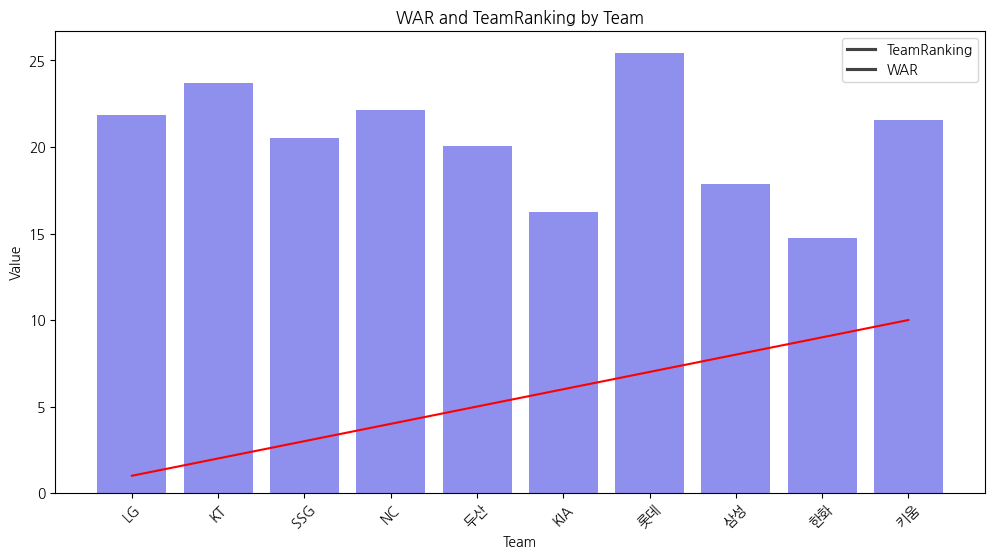

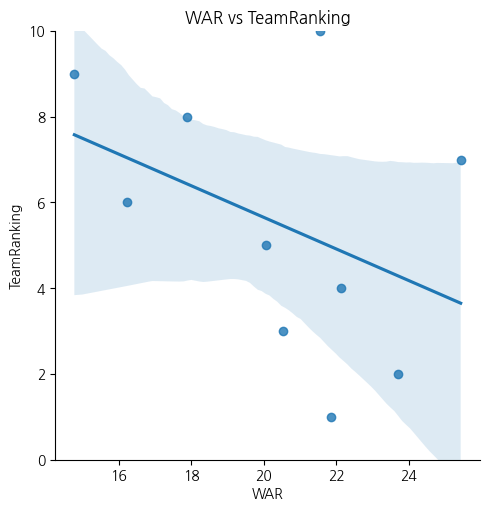

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 WAR을 막대 그래프로 시각화
sns.barplot(x='Team', y='WAR', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# 팀별 TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2023_pitching, color='r')

# 제목과 축 라벨 설정
plt.title('WAR and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['TeamRanking', 'WAR'])

# 그래프 출력
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# WAR와 TeamRanking 간의 산점도와 선형 회귀 선 그리기
sns.lmplot(x='WAR', y='TeamRanking', data=team_2023_pitching)
plt.title('WAR vs TeamRanking')
plt.xlabel('WAR')
plt.ylabel('TeamRanking')
plt.ylim(0, 10)
plt.show()


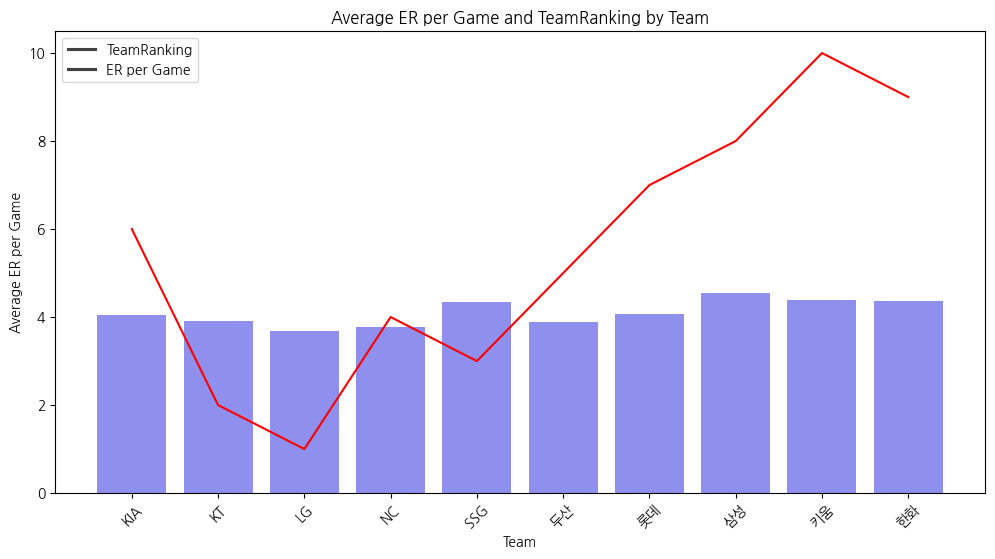

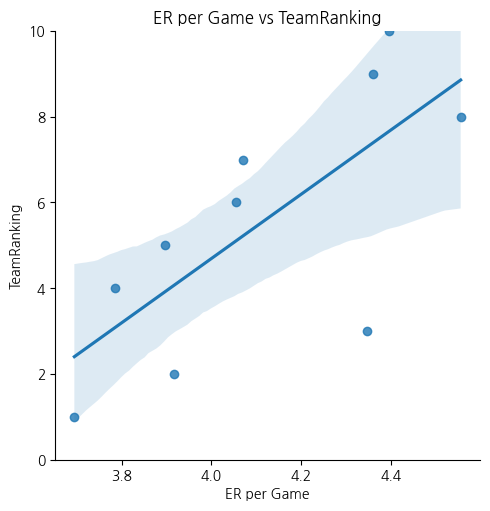

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ER을 144로 나눈 후 평균 계산
team_2023_pitching['ER_per_game'] = team_2023_pitching['ER'] / 144
average_er_per_game_by_team = team_2023_pitching.groupby('Team')['ER_per_game'].mean().reset_index()

# TeamRanking을 오름차순으로 정렬
team_2021_pitching_sorted = team_2023_pitching.sort_values(by='TeamRanking')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 ER을 막대 그래프로 시각화
sns.barplot(x='Team', y='ER_per_game', data=average_er_per_game_by_team, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# 팀별 TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching_sorted, color='r')

# 제목과 축 라벨 설정
plt.title('Average ER per Game and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Average ER per Game')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['TeamRanking', 'ER per Game'])

# 그래프 출력
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# ER을 144로 나눈 값을 추가
team_2023_pitching['ER_per_game'] = team_2023_pitching['ER'] / 144

# ER_per_game과 TeamRanking 간의 상관 관계 시각화
sns.lmplot(x='ER_per_game', y='TeamRanking', data=team_2023_pitching)
plt.title('ER per Game vs TeamRanking')
plt.xlabel('ER per Game')
plt.ylabel('TeamRanking')
plt.ylim(0, 10)
plt.show()


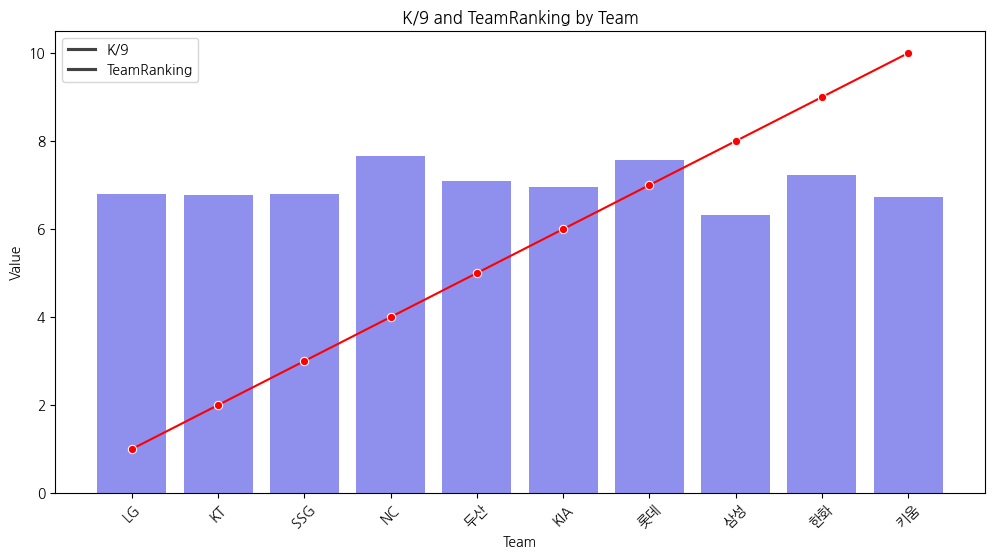

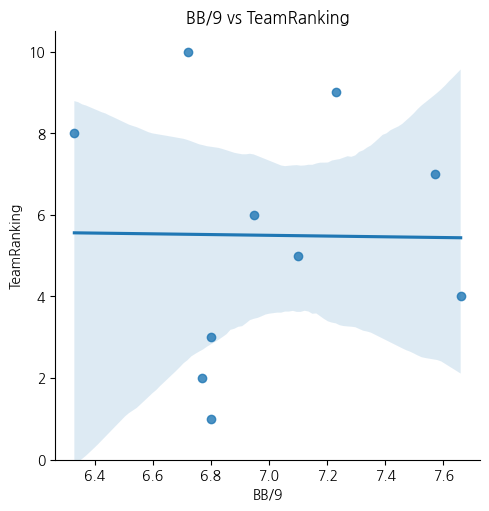

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 K/9을 막대 그래프로 시각화
sns.barplot(x='Team', y='K/9', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2023_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

# 제목과 축 라벨 설정
plt.title('K/9 and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['K/9', 'TeamRanking'])

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='K/9', y='TeamRanking', data=team_2023_pitching)
plt.title('BB/9 vs TeamRanking')
plt.xlabel('BB/9')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


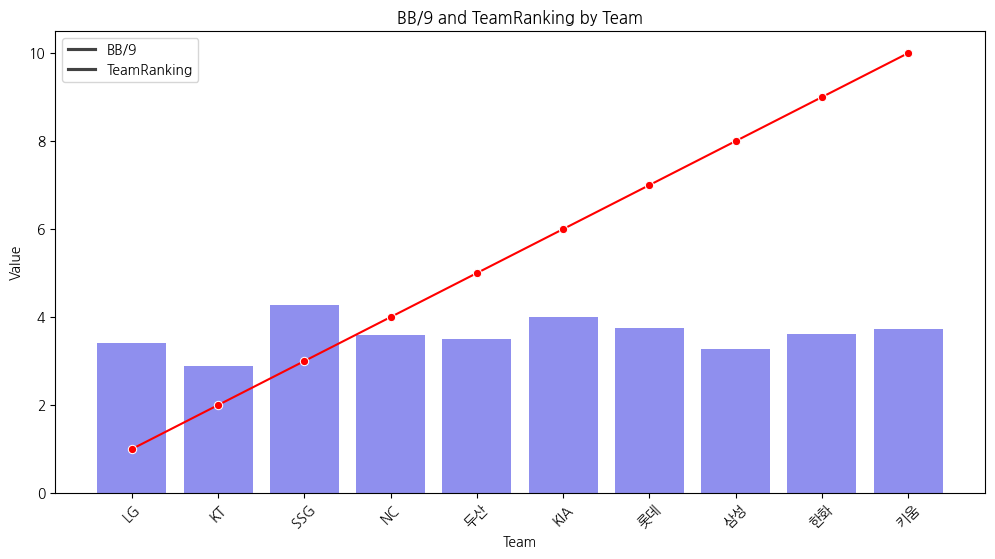

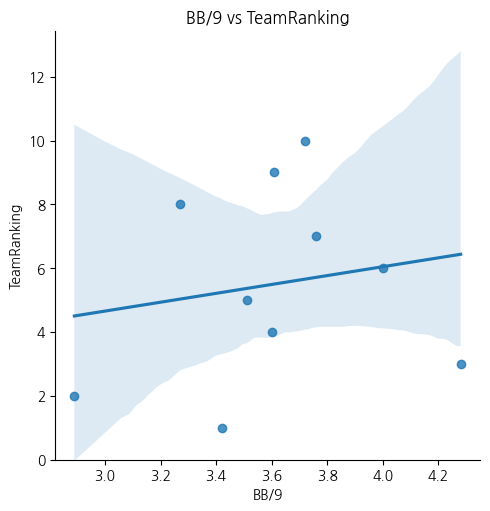

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='BB/9', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2023_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('BB/9 and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['BB/9', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BB/9', y='TeamRanking', data=team_2023_pitching)
plt.title('BB/9 vs TeamRanking')
plt.xlabel('BB/9')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


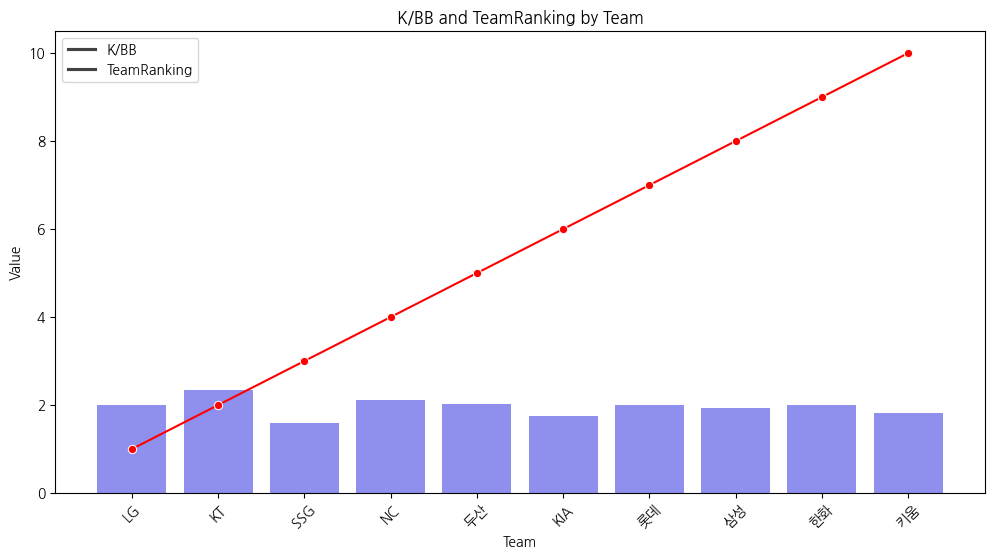

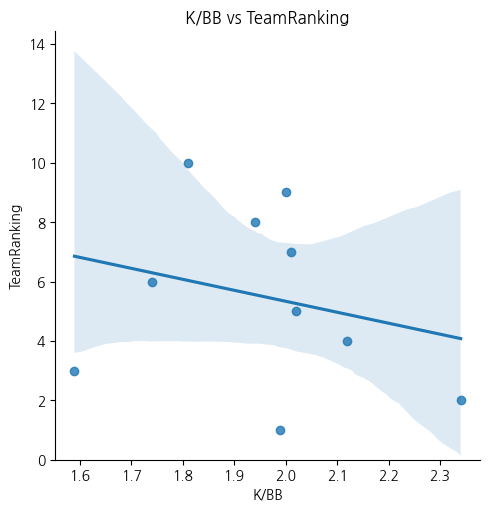

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='K/BB', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2023_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('K/BB and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['K/BB', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='K/BB', y='TeamRanking', data=team_2023_pitching)
plt.title('K/BB vs TeamRanking')
plt.xlabel('K/BB')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


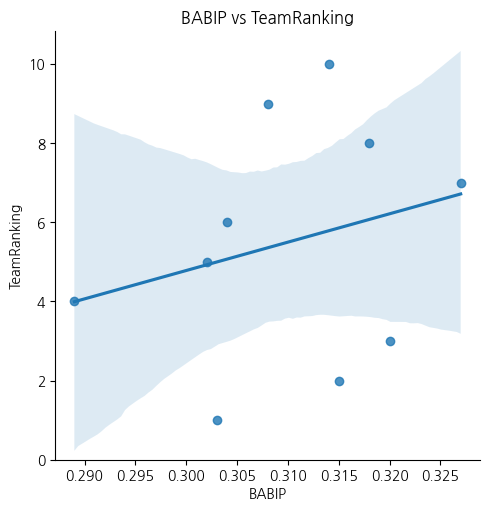

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BABIP', y='TeamRanking', data=team_2023_pitching)
plt.title('BABIP vs TeamRanking')
plt.xlabel('BABIP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

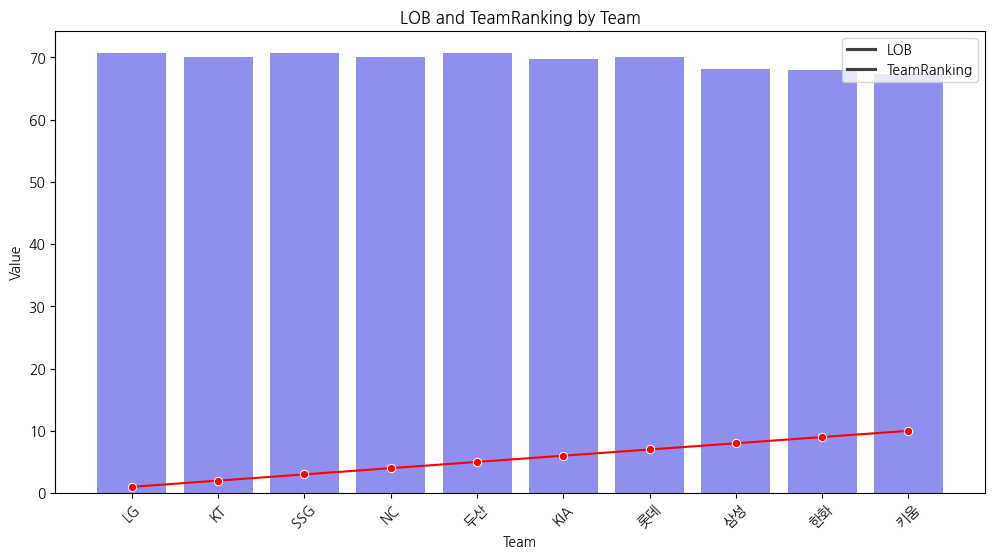

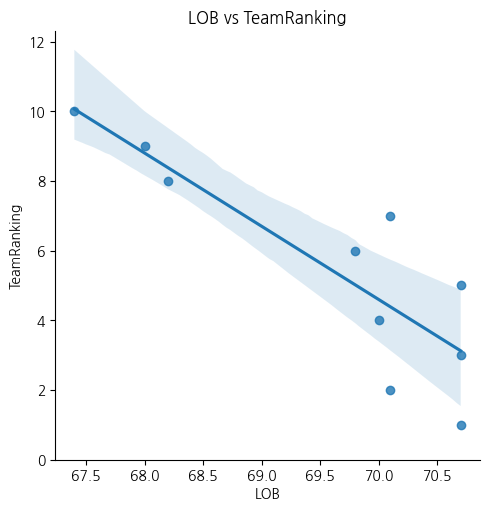

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='LOB', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2023_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('LOB and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['LOB', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='LOB', y='TeamRanking', data=team_2023_pitching)
plt.title('LOB vs TeamRanking')
plt.xlabel('LOB')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

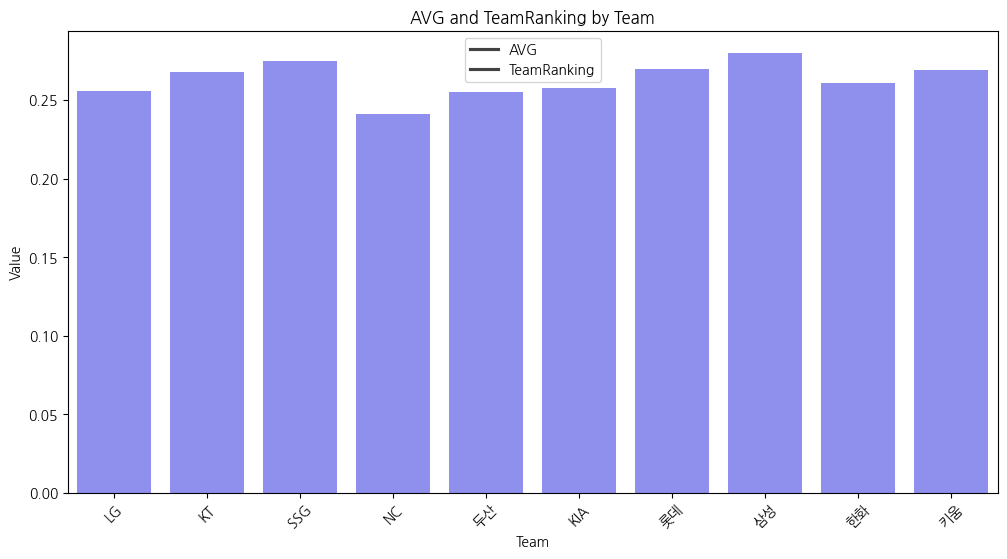

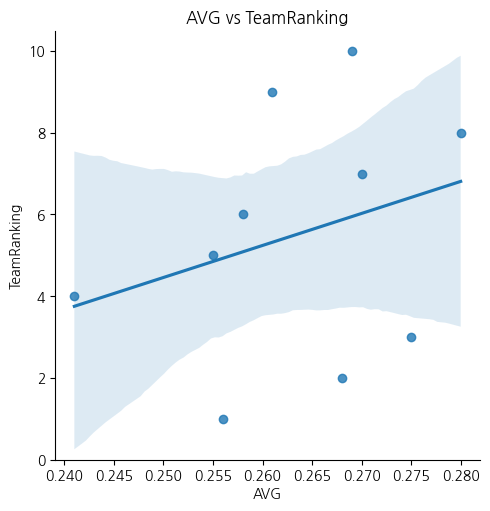

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='AVG', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('AVG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['AVG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='AVG', y='TeamRanking', data=team_2023_pitching)
plt.title('AVG vs TeamRanking')
plt.xlabel('AVG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

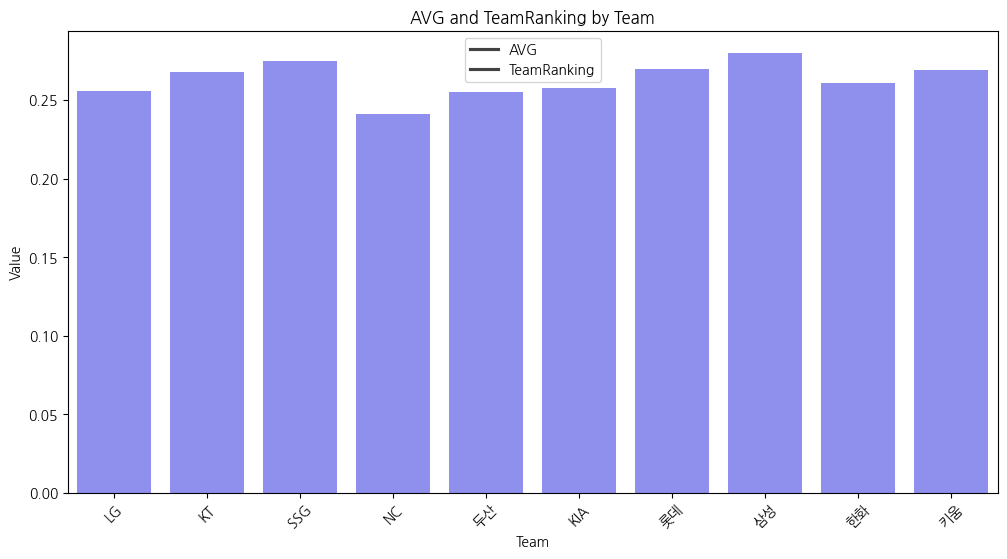

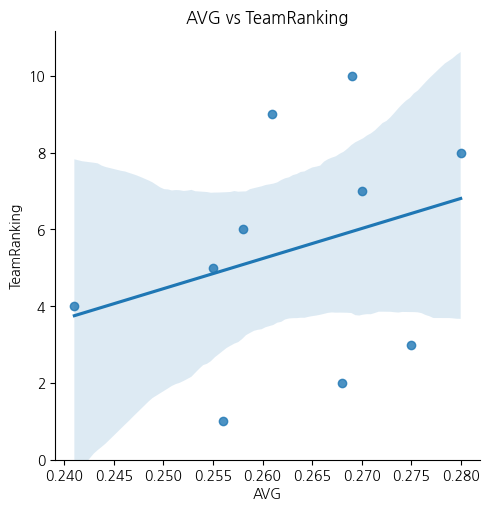

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='AVG', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('AVG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['AVG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='AVG', y='TeamRanking', data=team_2023_pitching)
plt.title('AVG vs TeamRanking')
plt.xlabel('AVG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

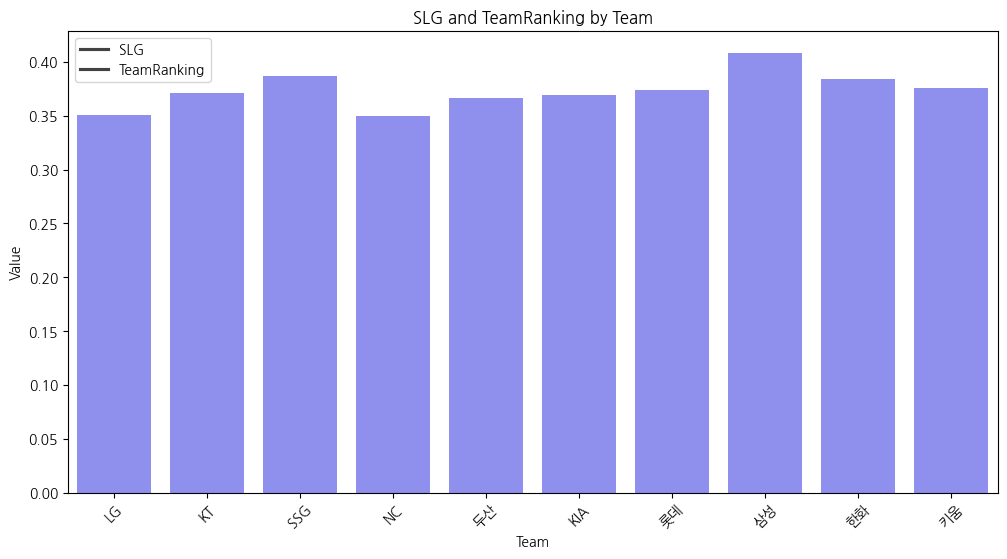

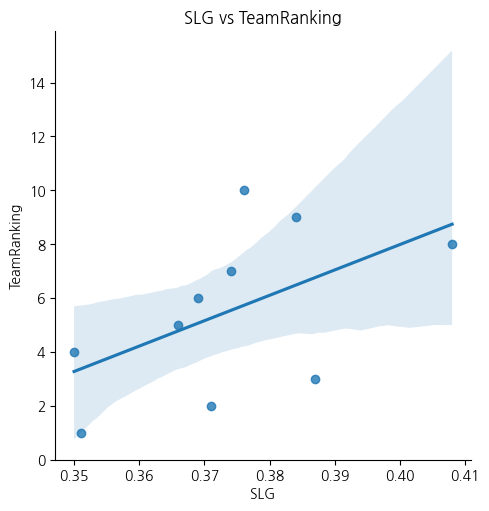

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='SLG', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('SLG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['SLG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='SLG', y='TeamRanking', data=team_2023_pitching)
plt.title('SLG vs TeamRanking')
plt.xlabel('SLG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

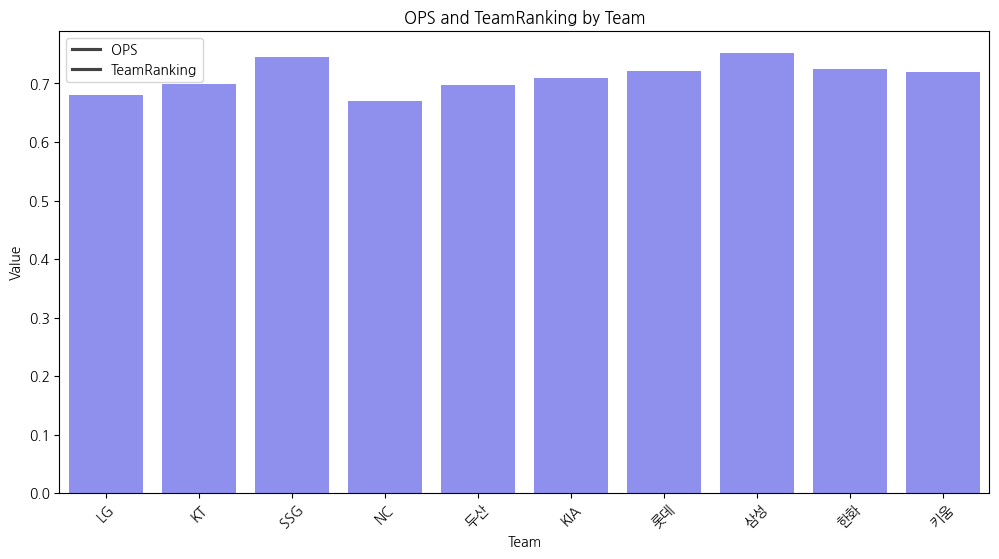

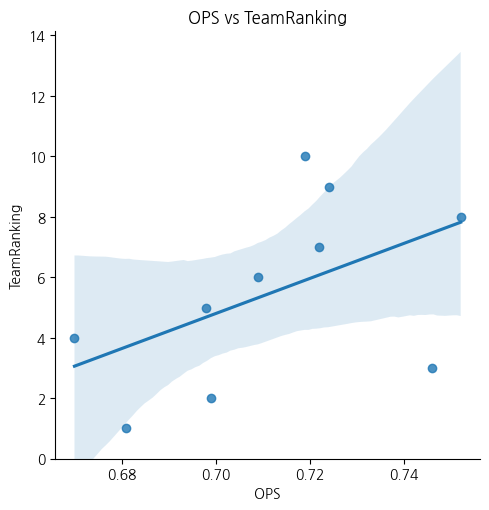

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='OPS', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('OPS and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['OPS', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='OPS', y='TeamRanking', data=team_2023_pitching)
plt.title('OPS vs TeamRanking')
plt.xlabel('OPS')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

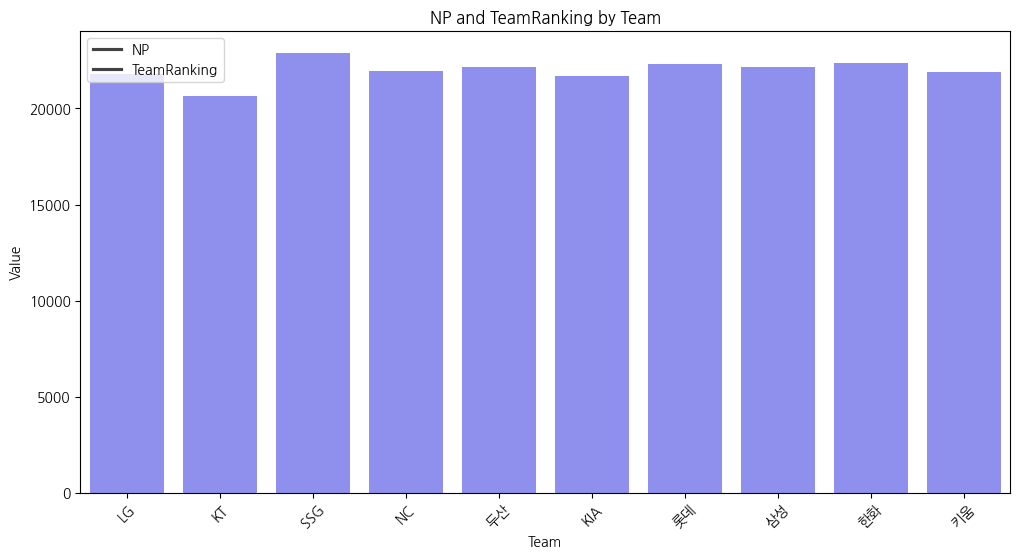

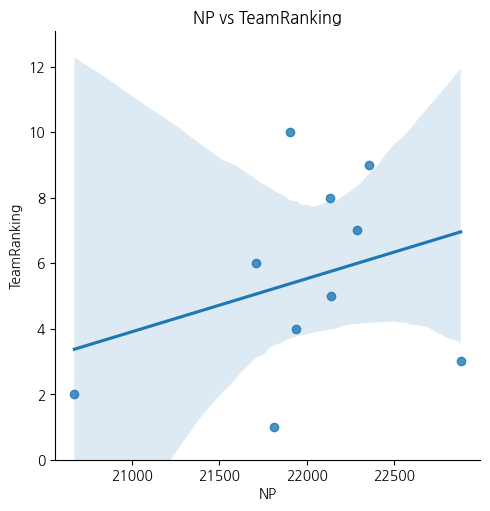

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='NP', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('NP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['NP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='NP', y='TeamRanking', data=team_2023_pitching)
plt.title('NP vs TeamRanking')
plt.xlabel('NP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

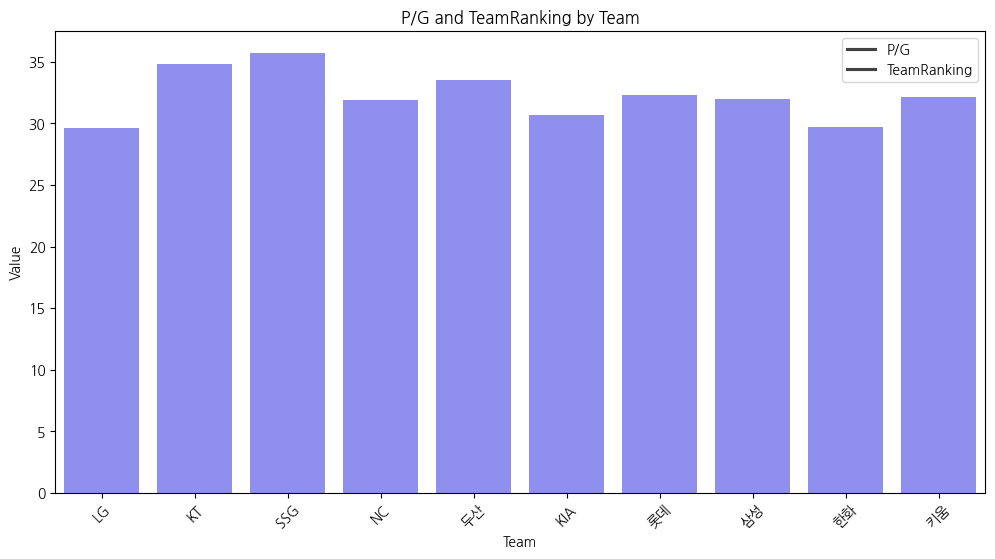

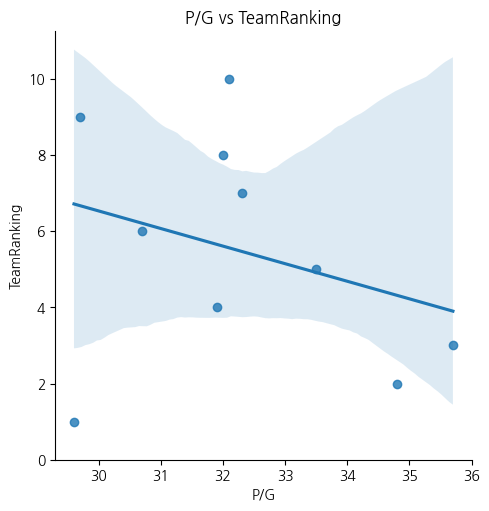

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/G', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/G and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/G', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/G', y='TeamRanking', data=team_2023_pitching)
plt.title('P/G vs TeamRanking')
plt.xlabel('P/G')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

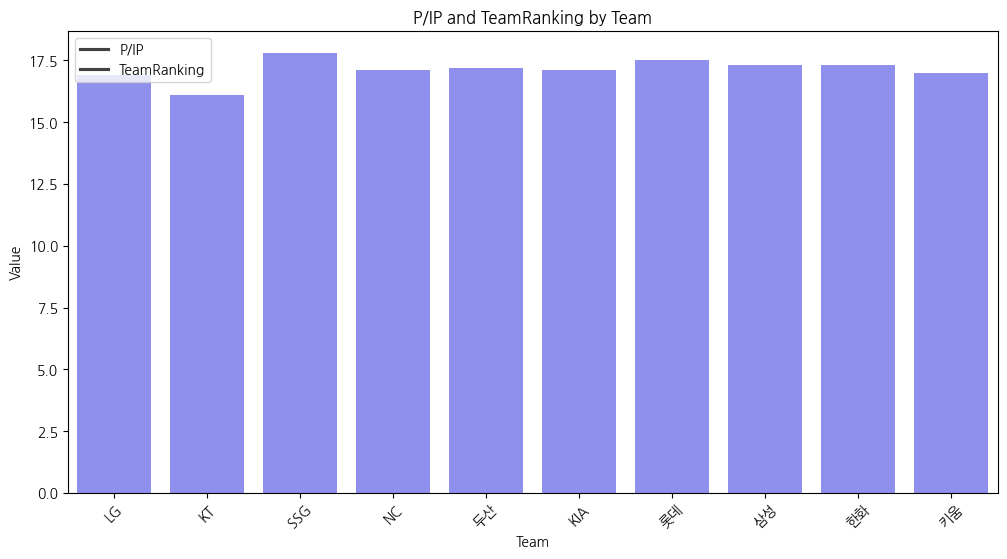

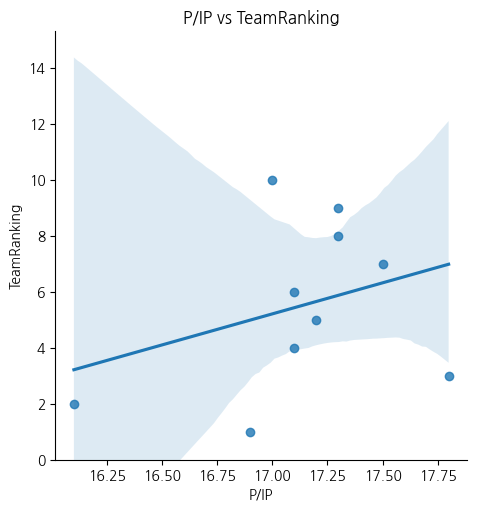

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/IP', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/IP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/IP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/IP', y='TeamRanking', data=team_2023_pitching)
plt.title('P/IP vs TeamRanking')
plt.xlabel('P/IP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

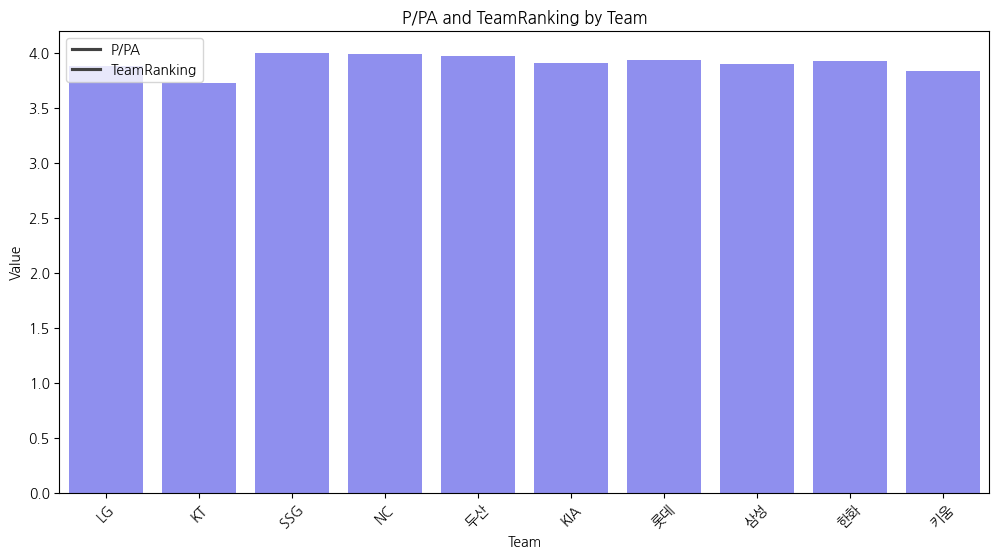

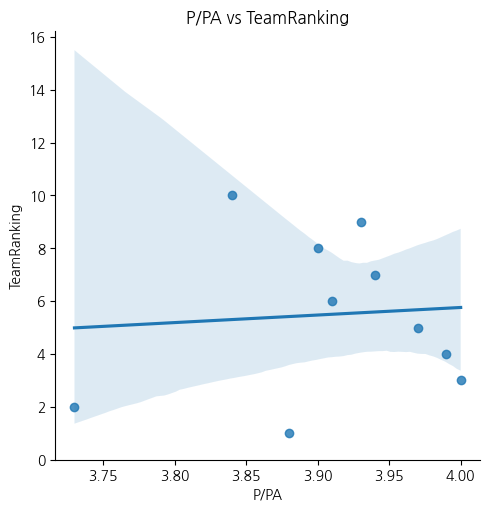

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/PA', data=team_2023_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/PA and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/PA', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/PA', y='TeamRanking', data=team_2023_pitching)
plt.title('P/PA vs TeamRanking')
plt.xlabel('P/PA')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()